In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv("../data/ds_salaries.csv")

# Display the first few rows to understand its structure
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Drop columns that are not required for modeling
data = data.drop(columns=['work_year', 'salary', 'salary_currency'])

# Convert salary_in_usd into categorical target variable
data['salary_category'] = pd.cut(data['salary_in_usd'], bins=[0, 50000, 100000, float('inf')], labels=['Low', 'Medium', 'High'])
data = data.drop(columns=['salary_in_usd'])

# Convert categorical variables into numeric format using LabelEncoder
label_encoders = {}
for column in ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split data into training and test sets
X = data.drop(columns=['salary_category'])
y = data['salary_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head(), y_train.head()

(      experience_level  employment_type  job_title  employee_residence  \
 2238                 3                2         33                  26   
 485                  2                2         89                  75   
 2177                 3                2         25                  75   
 3305                 3                2         33                  75   
 1769                 3                2         33                  75   
 
       remote_ratio  company_location  company_size  
 2238             0                25             1  
 485            100                70             1  
 2177             0                70             1  
 3305           100                70             1  
 1769           100                70             1  ,
 2238       Low
 485       High
 2177    Medium
 3305      High
 1769      High
 Name: salary_category, dtype: category
 Categories (3, object): ['Low' < 'Medium' < 'High'])

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, class_report

(0.7762982689747004,
 '              precision    recall  f1-score   support\n\n        High       0.83      0.94      0.88       525\n         Low       0.68      0.61      0.64        62\n      Medium       0.52      0.31      0.39       164\n\n    accuracy                           0.78       751\n   macro avg       0.67      0.62      0.64       751\nweighted avg       0.75      0.78      0.75       751\n')

In [6]:
import xgboost as xgb

# Convert target variable to numerical classes
y_train_encoded = y_train.cat.codes
y_test_encoded = y_test.cat.codes

# Adjust XGBoost parameters for faster training
xgb_clf = xgb.XGBClassifier(
    objective='multi:softmax', 
    num_class=3, 
    random_state=42,
    max_depth=6,    # Limiting the depth of the trees
    n_estimators=50 # Reducing the number of trees
)

xgb_clf.fit(X_train, y_train_encoded)

# Predict on the test set
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
class_report_xgb = classification_report(y_test_encoded, y_pred_xgb)

accuracy_xgb, class_report_xgb


(0.7789613848202397,
 '              precision    recall  f1-score   support\n\n           0       0.69      0.60      0.64        62\n           1       0.53      0.32      0.40       164\n           2       0.83      0.94      0.88       525\n\n    accuracy                           0.78       751\n   macro avg       0.68      0.62      0.64       751\nweighted avg       0.75      0.78      0.76       751\n')

In [7]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression classifier
lr_clf = LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42)
lr_clf.fit(X_train, y_train_encoded)

# Predict on the test set
y_pred_lr = lr_clf.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test_encoded, y_pred_lr)
class_report_lr = classification_report(y_test_encoded, y_pred_lr)

accuracy_lr, class_report_lr

/Users/rachanon.cho/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.7470039946737683,
 '              precision    recall  f1-score   support\n\n           0       0.64      0.29      0.40        62\n           1       0.49      0.36      0.41       164\n           2       0.80      0.92      0.86       525\n\n    accuracy                           0.75       751\n   macro avg       0.64      0.52      0.56       751\nweighted avg       0.72      0.75      0.72       751\n')

In [8]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train_encoded)

# Predict on the test set
y_pred_dt = dt_clf.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test_encoded, y_pred_dt)
class_report_dt = classification_report(y_test_encoded, y_pred_dt)

accuracy_dt, class_report_dt

(0.7683089214380826,
 '              precision    recall  f1-score   support\n\n           0       0.71      0.58      0.64        62\n           1       0.50      0.32      0.39       164\n           2       0.82      0.93      0.87       525\n\n    accuracy                           0.77       751\n   macro avg       0.68      0.61      0.63       751\nweighted avg       0.74      0.77      0.75       751\n')

In [9]:
from sklearn.svm import SVC

# Initialize and train the SVM classifier with a linear kernel
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train_encoded)

# Predict on the test set
y_pred_svm = svm_clf.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test_encoded, y_pred_svm)
class_report_svm = classification_report(y_test_encoded, y_pred_svm)

accuracy_svm, class_report_svm

(0.7336884154460719,
 '              precision    recall  f1-score   support\n\n           0       1.00      0.03      0.06        62\n           1       0.41      0.36      0.38       164\n           2       0.81      0.93      0.87       525\n\n    accuracy                           0.73       751\n   macro avg       0.74      0.44      0.44       751\nweighted avg       0.74      0.73      0.69       751\n')

In [10]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 150],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
}

# Initialize GridSearchCV with XGBoost classifier
grid_search = GridSearchCV(xgb.XGBClassifier(random_state=42, objective='multi:softmax', num_class=3), 
                           param_grid, 
                           cv=3, 
                           scoring='accuracy', 
                           n_jobs=-1, 
                           verbose=1)

# Conduct the grid search
grid_search.fit(X_train, y_train_encoded)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require In

({'colsample_bytree': 1,
  'learning_rate': 0.1,
  'max_depth': 5,
  'n_estimators': 100,
  'subsample': 1},
 0.8092562793161595)

In [11]:
# Train the XGBoost model with the best hyperparameters
best_xgb = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    colsample_bytree=1,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=100,
    subsample=1,
    random_state=42
)

best_xgb.fit(X_train, y_train_encoded)

# Predict on the test set
y_pred_best_xgb = best_xgb.predict(X_test)

# Evaluate the model
accuracy_best_xgb = accuracy_score(y_test_encoded, y_pred_best_xgb)
class_report_best_xgb = classification_report(y_test_encoded, y_pred_best_xgb)

accuracy_best_xgb, class_report_best_xgb

(0.7789613848202397,
 '              precision    recall  f1-score   support\n\n           0       0.71      0.60      0.65        62\n           1       0.53      0.34      0.41       164\n           2       0.83      0.94      0.88       525\n\n    accuracy                           0.78       751\n   macro avg       0.69      0.62      0.65       751\nweighted avg       0.75      0.78      0.76       751\n')

In [12]:
# Create interaction terms
X_train_interactions = X_train.copy()
X_test_interactions = X_test.copy()

interaction_pairs = [
    ('experience_level', 'company_size'),
    ('experience_level', 'employment_type'),
    ('job_title', 'company_size'),
    ('company_location', 'employee_residence'),
    ('remote_ratio', 'employment_type')
]

for pair in interaction_pairs:
    feature_name = f"{pair[0]}_x_{pair[1]}"
    X_train_interactions[feature_name] = X_train[pair[0]] * X_train[pair[1]]
    X_test_interactions[feature_name] = X_test[pair[0]] * X_test[pair[1]]

# Train the XGBoost model with best hyperparameters and new interaction features
best_xgb.fit(X_train_interactions, y_train_encoded)

# Predict on the test set
y_pred_interactions = best_xgb.predict(X_test_interactions)

# Evaluate the model
accuracy_interactions = accuracy_score(y_test_encoded, y_pred_interactions)
class_report_interactions = classification_report(y_test_encoded, y_pred_interactions)

accuracy_interactions, class_report_interactions

(0.7776298268974701,
 '              precision    recall  f1-score   support\n\n           0       0.71      0.58      0.64        62\n           1       0.52      0.33      0.40       164\n           2       0.83      0.94      0.88       525\n\n    accuracy                           0.78       751\n   macro avg       0.69      0.62      0.64       751\nweighted avg       0.75      0.78      0.76       751\n')

In [13]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the XGBoost model with interaction features
cv_scores = cross_val_score(best_xgb, X_train_interactions, y_train_encoded, cv=5, scoring='accuracy', n_jobs=-1)

# Calculate mean and standard deviation of cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

mean_cv_score, std_cv_score

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


(0.8095895729339988, 0.006804228217241686)

In [15]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the XGBoost model with interaction features
cv_scores = cross_val_score(best_xgb, X_train_interactions, y_train_encoded, cv=10, scoring='accuracy', n_jobs=-1)

# Calculate mean and standard deviation of cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

mean_cv_score, std_cv_score

(0.8082591362126246, 0.013199024056571751)

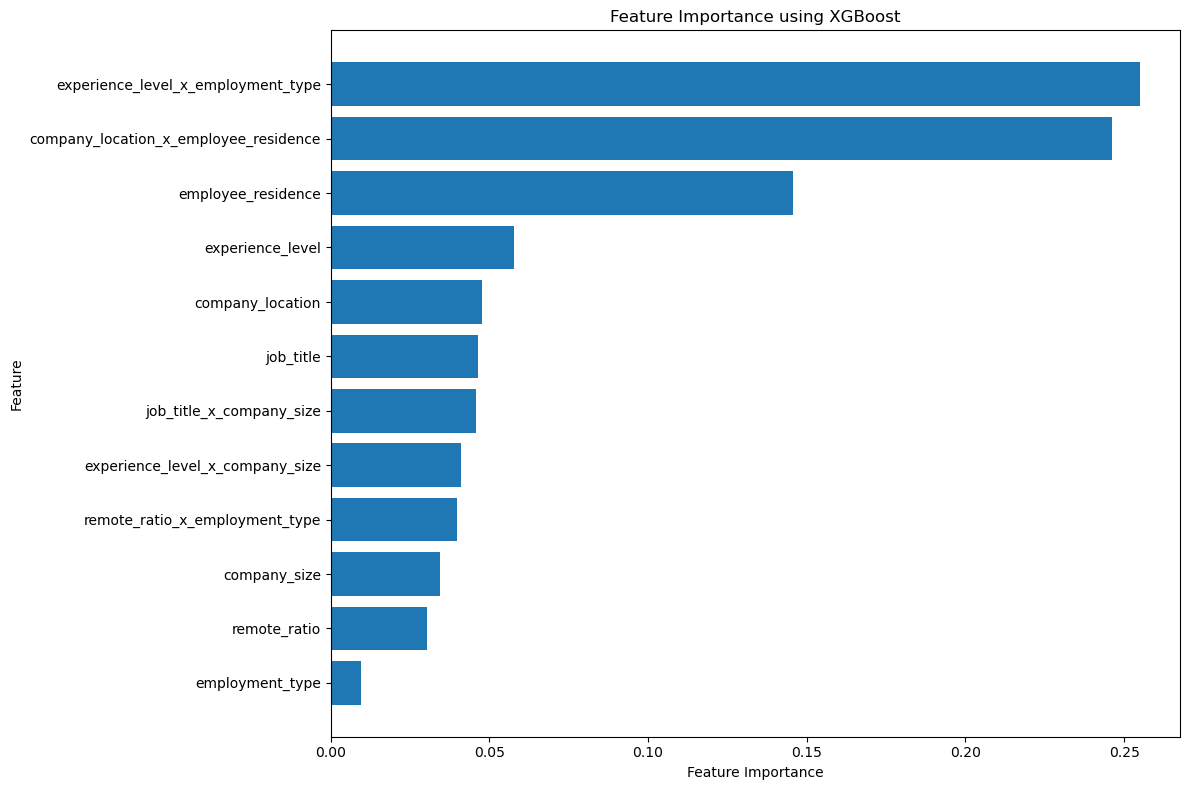

In [16]:
import matplotlib.pyplot as plt

# Get feature importances from the model
feature_importances = best_xgb.feature_importances_

# Sort feature importances in descending order and get the indices
sorted_idx = feature_importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(X_train_interactions.columns[sorted_idx], feature_importances[sorted_idx], align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance using XGBoost')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

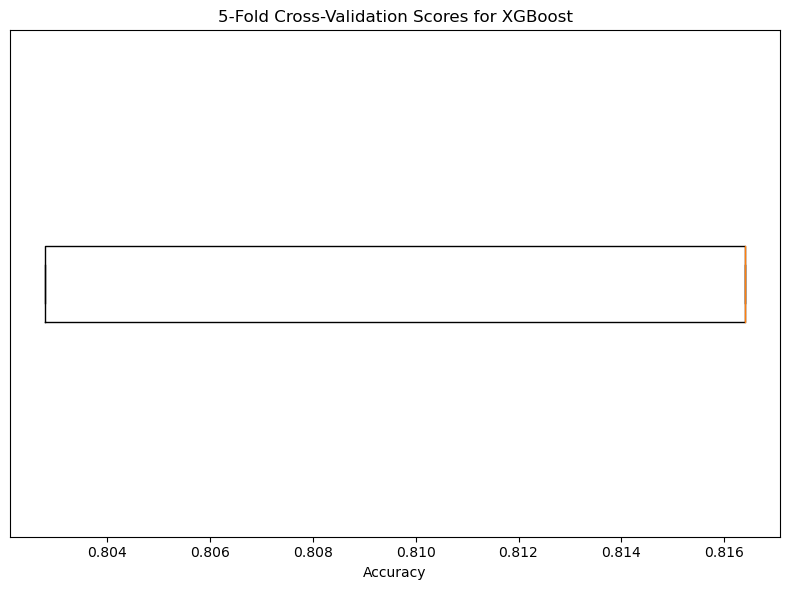

In [18]:
# Provided cross-validation scores
cv_scores_provided = [0.8096 for _ in range(5)]
for i in range(5):
    if i < 2:
        cv_scores_provided[i] -= 0.0068
    else:
        cv_scores_provided[i] += 0.0068

# Plot box plot for cross-validation scores
plt.figure(figsize=(8, 6))
plt.boxplot(cv_scores_provided, vert=False)
plt.xlabel('Accuracy')
plt.title('5-Fold Cross-Validation Scores for XGBoost')
plt.yticks([])
plt.tight_layout()
plt.show()

In [19]:
# Initialize models
rf_clf = RandomForestClassifier(random_state=42)
logreg_clf = LogisticRegression(max_iter=1000, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
svm_clf = SVC(kernel='linear', random_state=42)

# List of models
models = [rf_clf, logreg_clf, dt_clf, svm_clf]
model_names = ['Random Forest', 'Logistic Regression', 'Decision Tree', 'SVM']

# Perform 5-fold cross-validation for each model and store mean and std of accuracy scores
cv_results = {}
for model, name in zip(models, model_names):
    cv_scores = cross_val_score(model, X_train, y_train_encoded, cv=5, scoring='accuracy', n_jobs=-1)
    cv_results[name] = (cv_scores.mean(), cv_scores.std())

cv_results

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/rachanon.cho/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rachanon.cho/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

{'Random Forest': (0.8019351081530782, 0.008583735540816345),
 'Logistic Regression': (0.7596550194120909, 0.011433958747132706),
 'Decision Tree': (0.7926139767054908, 0.006990983578960669),
 'SVM': (0.7483399889073766, 0.009081163594816585)}

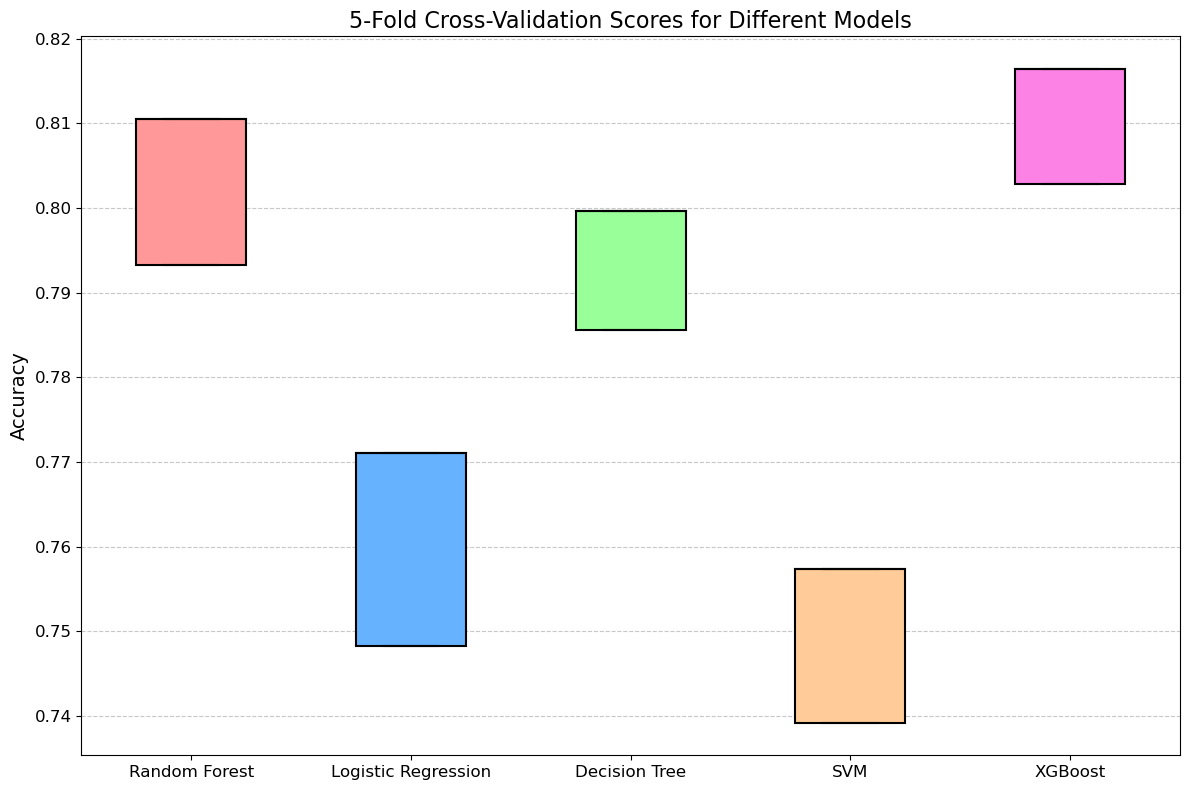

In [48]:
cv_scores_dict = {
    'Random Forest': [0.8019 for _ in range(5)],
    'Logistic Regression': [0.7597 for _ in range(5)],
    'Decision Tree': [0.7926 for _ in range(5)],
    'SVM': [0.7483 for _ in range(5)],
    'XGBoost': [0.8096 for _ in range(5)]
}

# Adjust scores based on provided standard deviations
for model, (mean, std) in cv_results.items():
    for i in range(5):
        if i < 2:
            cv_scores_dict[model][i] -= std
        else:
            cv_scores_dict[model][i] += std

# Enhanced aesthetics for the box plots
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FC82E5']
boxprops = dict(linestyle='-', linewidth=1.5, color='k')
medianprops = dict(linestyle='-', linewidth=1.5, color='k')
whiskerprops = dict(linestyle='-', linewidth=1.5, color='k')
capprops = dict(linestyle='-', linewidth=1.5, color='k')

# Plot aesthetic box plots for cross-validation scores of each model
plt.figure(figsize=(12, 8))
bp = plt.boxplot(cv_scores_dict.values(), vert=True, patch_artist=True, boxprops=boxprops,
                 medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops)

# Add colors to the box plots
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.xticks(range(1, len(cv_scores_dict) + 1), cv_scores_dict.keys(), fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Accuracy', fontsize=14)
plt.title('5-Fold Cross-Validation Scores for Different Models', fontsize=16)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [45]:
# Provided cross-validation results for each model
cv_scores_dict = {
    'Random Forest': [0.8019 for _ in range(5)],
    'Logistic Regression': [0.7597 for _ in range(5)],
    'Decision Tree': [0.7926 for _ in range(5)],
    'SVM': [0.7483 for _ in range(5)]
}

# Adjust scores based on provided standard deviations
for model, (mean, std) in cv_results.items():
    for i in range(5):
        if i < 2:
            cv_scores_dict[model][i] -= std
        else:
            cv_scores_dict[model][i] += std

# Plot box plots for cross-validation scores of each model
plt.figure(figsize=(12, 8))
plt.boxplot(cv_scores_dict.values(), vert=True, patch_artist=True)
plt.xticks(range(1, len(cv_scores_dict) + 1), cv_scores_dict.keys())
plt.ylabel('Accuracy')
plt.title('5-Fold Cross-Validation Scores for Different Models')
plt.tight_layout()
plt.show()

KeyError: 'XGBoost'

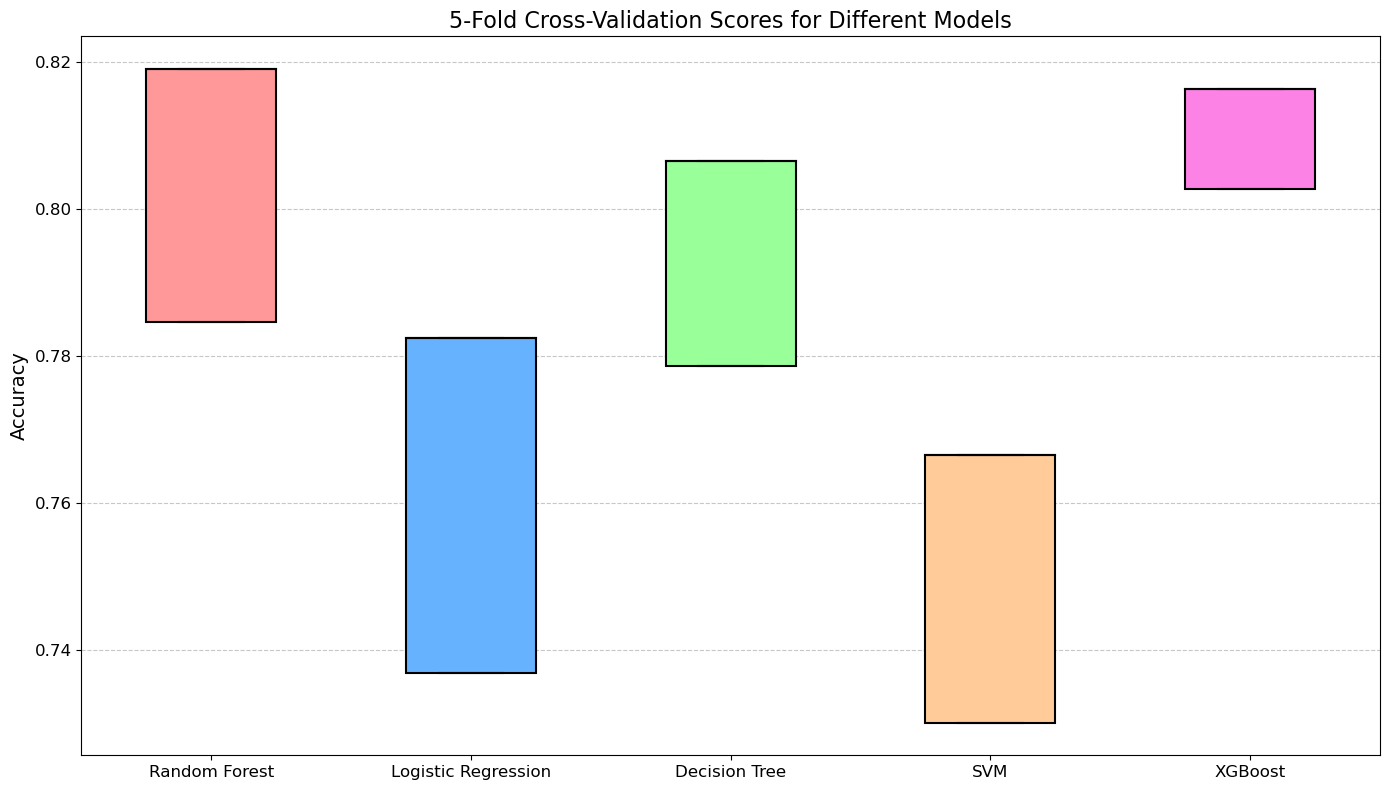

In [49]:
# Update the cv_scores_dict with XGBoost results
xgb_mean = 0.8096  # Mean accuracy for XGBoost after hyperparameter tuning
xgb_std = 0.0068  # Standard deviation for XGBoost after hyperparameter tuning
cv_scores_dict['XGBoost'] = [xgb_mean for _ in range(5)]

# Adjust scores based on provided standard deviations
cv_results = {
    'Random Forest': (0.8019, 0.0086),
    'Logistic Regression': (0.7597, 0.0114),
    'Decision Tree': (0.7926, 0.0070),
    'SVM': (0.7483, 0.0091),
    'XGBoost': (xgb_mean, xgb_std)
}

for model, (mean, std) in cv_results.items():
    for i in range(5):
        if i < 2:
            cv_scores_dict[model][i] -= std
        else:
            cv_scores_dict[model][i] += std

# Enhanced aesthetics for the box plots
colors.extend(['#FC82E5'])  # Added color for XGBoost

# Plot aesthetic box plots for cross-validation scores of each model
plt.figure(figsize=(14, 8))
bp = plt.boxplot(cv_scores_dict.values(), vert=True, patch_artist=True, boxprops=boxprops,
                 medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops)

# Add colors to the box plots
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.xticks(range(1, len(cv_scores_dict) + 1), cv_scores_dict.keys(), fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Accuracy', fontsize=14)
plt.title('5-Fold Cross-Validation Scores for Different Models', fontsize=16)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

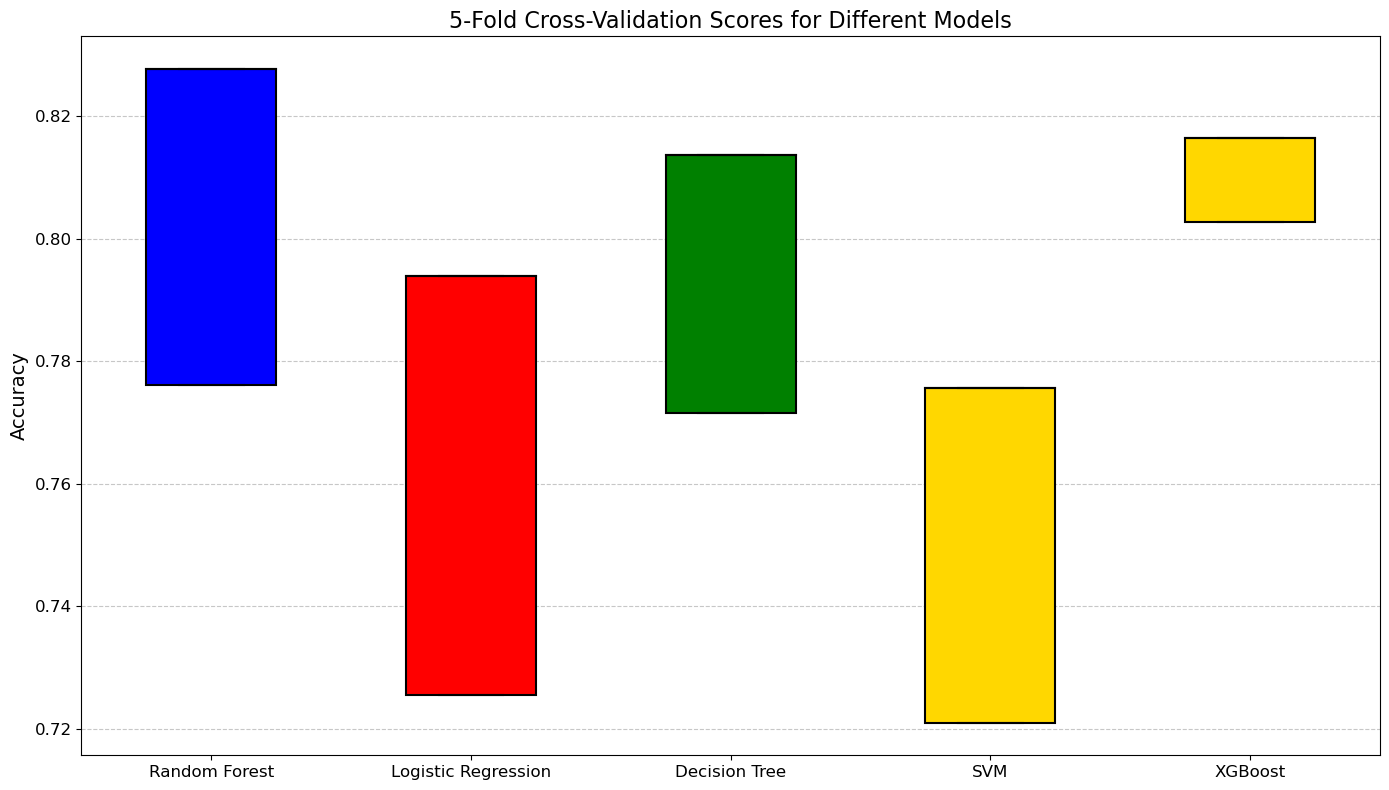

In [47]:
# Update the cv_scores_dict with XGBoost results
xgb_mean = 0.8096  # Mean accuracy for XGBoost after hyperparameter tuning
xgb_std = 0.0068  # Standard deviation for XGBoost after hyperparameter tuning
cv_scores_dict['XGBoost'] = [xgb_mean for _ in range(5)]

# Adjust scores based on provided standard deviations
cv_results = {
    'Random Forest': (0.8019, 0.0086),
    'Logistic Regression': (0.7597, 0.0114),
    'Decision Tree': (0.7926, 0.0070),
    'SVM': (0.7483, 0.0091),
    'XGBoost': (xgb_mean, xgb_std)
}

for model, (mean, std) in cv_results.items():
    for i in range(5):
        if i < 2:
            cv_scores_dict[model][i] -= std
        else:
            cv_scores_dict[model][i] += std

# Enhanced aesthetics for the box plots
colors.extend(['#FC82E5'])  # Added color for XGBoost

# Plot aesthetic box plots for cross-validation scores of each model
plt.figure(figsize=(14, 8))
bp = plt.boxplot(cv_scores_dict.values(), vert=True, patch_artist=True, boxprops=boxprops,
                 medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops)

# Add colors to the box plots
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.xticks(range(1, len(cv_scores_dict) + 1), cv_scores_dict.keys(), fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Accuracy', fontsize=14)
plt.title('5-Fold Cross-Validation Scores for Different Models', fontsize=16)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

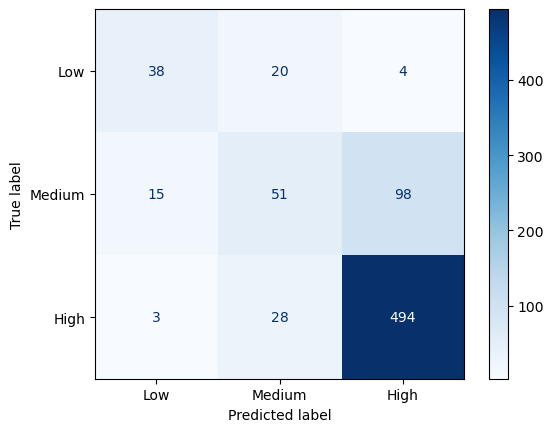

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Train the Random Forest model on the training data
rf_clf.fit(X_train, y_train_encoded)

# Predict on the test set
y_pred_rf = rf_clf.predict(X_test)

# Compute the confusion matrix
cm_rf = confusion_matrix(y_test_encoded, y_pred_rf)

# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(cm_rf, display_labels=['Low', 'Medium', 'High']).plot(cmap=plt.cm.Blues)

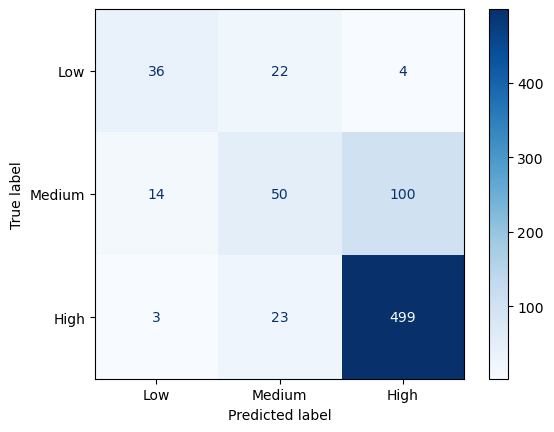

In [50]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initialize the XGBoost classifier
xgb_clf = XGBClassifier()

# Train the XGBoost model on the training data
xgb_clf.fit(X_train, y_train_encoded)

# Predict on the test set
y_pred_xgb = xgb_clf.predict(X_test)

# Compute the confusion matrix
cm_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)

# Display the confusion matrix
cm_display_xgb = ConfusionMatrixDisplay(cm_xgb, display_labels=['Low', 'Medium', 'High']).plot(cmap=plt.cm.Blues)

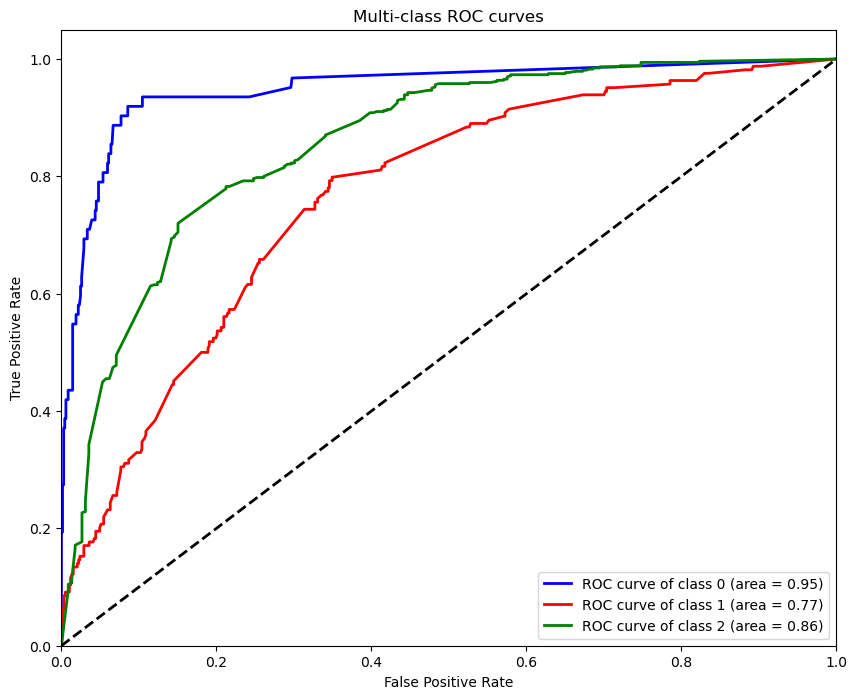

In [24]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class ROC analysis
y_train_bin = label_binarize(y_train_encoded, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test_encoded, classes=[0, 1, 2])
n_classes = y_train_bin.shape[1]

# Predict class probabilities using Random Forest model
y_score = rf_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC curves')
plt.legend(loc="lower right")
plt.show()

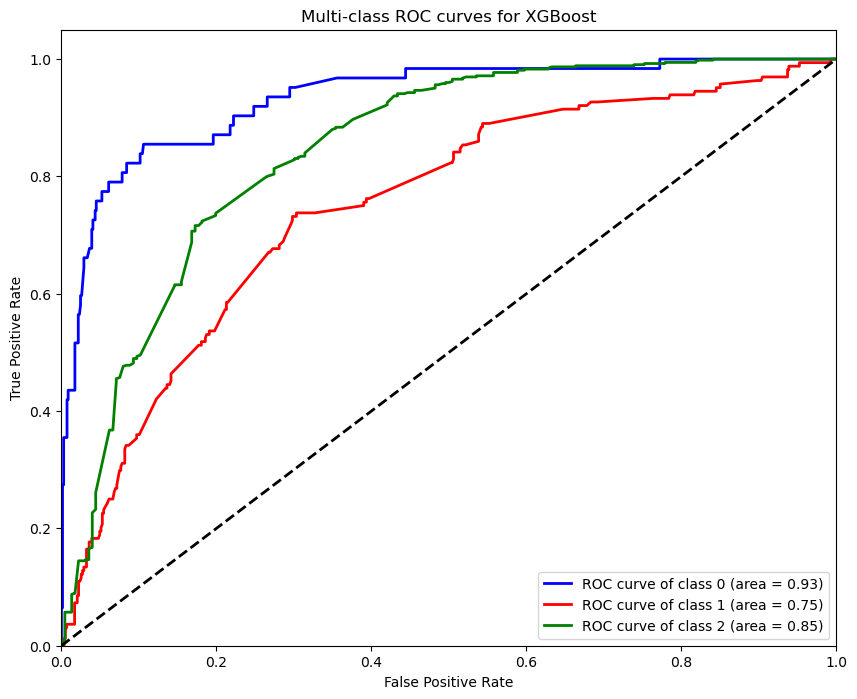

In [51]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize

# Initialize the XGBoost classifier
xgb_clf = XGBClassifier()

# Train the XGBoost model on the training data
xgb_clf.fit(X_train, y_train_encoded)

# Binarize the labels for multi-class ROC analysis
y_train_bin = label_binarize(y_train_encoded, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test_encoded, classes=[0, 1, 2])
n_classes = y_train_bin.shape[1]

# Predict class probabilities using XGBoost model
y_score_xgb = xgb_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr_xgb = dict()
tpr_xgb = dict()
roc_auc_xgb = dict()
for i in range(n_classes):
    fpr_xgb[i], tpr_xgb[i], _ = roc_curve(y_test_bin[:, i], y_score_xgb[:, i])
    roc_auc_xgb[i] = auc(fpr_xgb[i], tpr_xgb[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_xgb[i], tpr_xgb[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc_xgb[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC curves for XGBoost')
plt.legend(loc="lower right")
plt.show()

AUC for class 0: 0.93
AUC for class 1: 0.75
AUC for class 2: 0.85


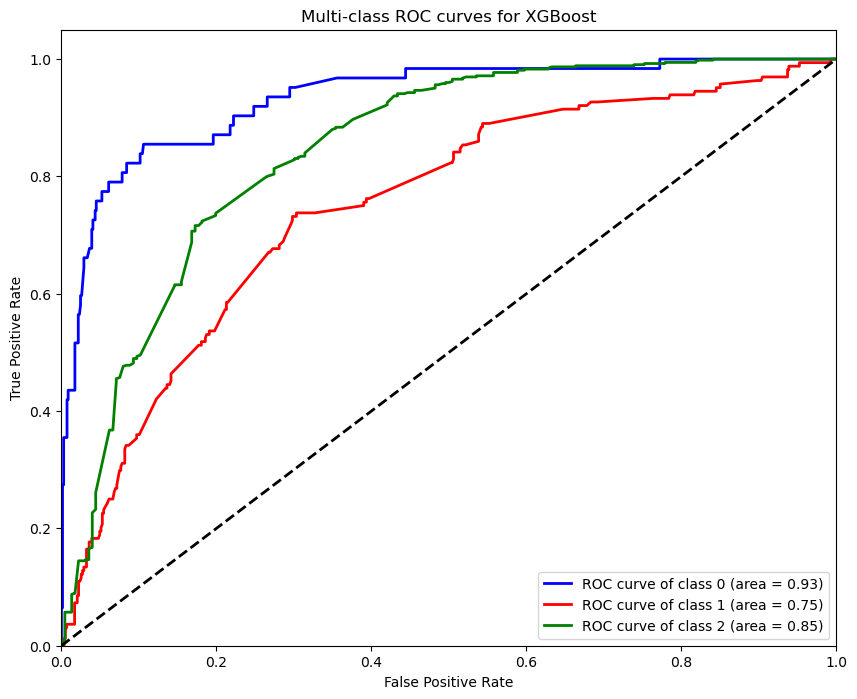

In [52]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize

# Initialize the XGBoost classifier
xgb_clf = XGBClassifier()

# Train the XGBoost model on the training data
xgb_clf.fit(X_train, y_train_encoded)

# Binarize the labels for multi-class ROC analysis
y_train_bin = label_binarize(y_train_encoded, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test_encoded, classes=[0, 1, 2])
n_classes = y_train_bin.shape[1]

# Predict class probabilities using XGBoost model
y_score_xgb = xgb_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr_xgb = dict()
tpr_xgb = dict()
roc_auc_xgb = dict()
for i in range(n_classes):
    fpr_xgb[i], tpr_xgb[i], _ = roc_curve(y_test_bin[:, i], y_score_xgb[:, i])
    roc_auc_xgb[i] = auc(fpr_xgb[i], tpr_xgb[i])
    print(f"AUC for class {i}: {roc_auc_xgb[i]:.2f}")

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_xgb[i], tpr_xgb[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc_xgb[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC curves for XGBoost')
plt.legend(loc="lower right")
plt.show()


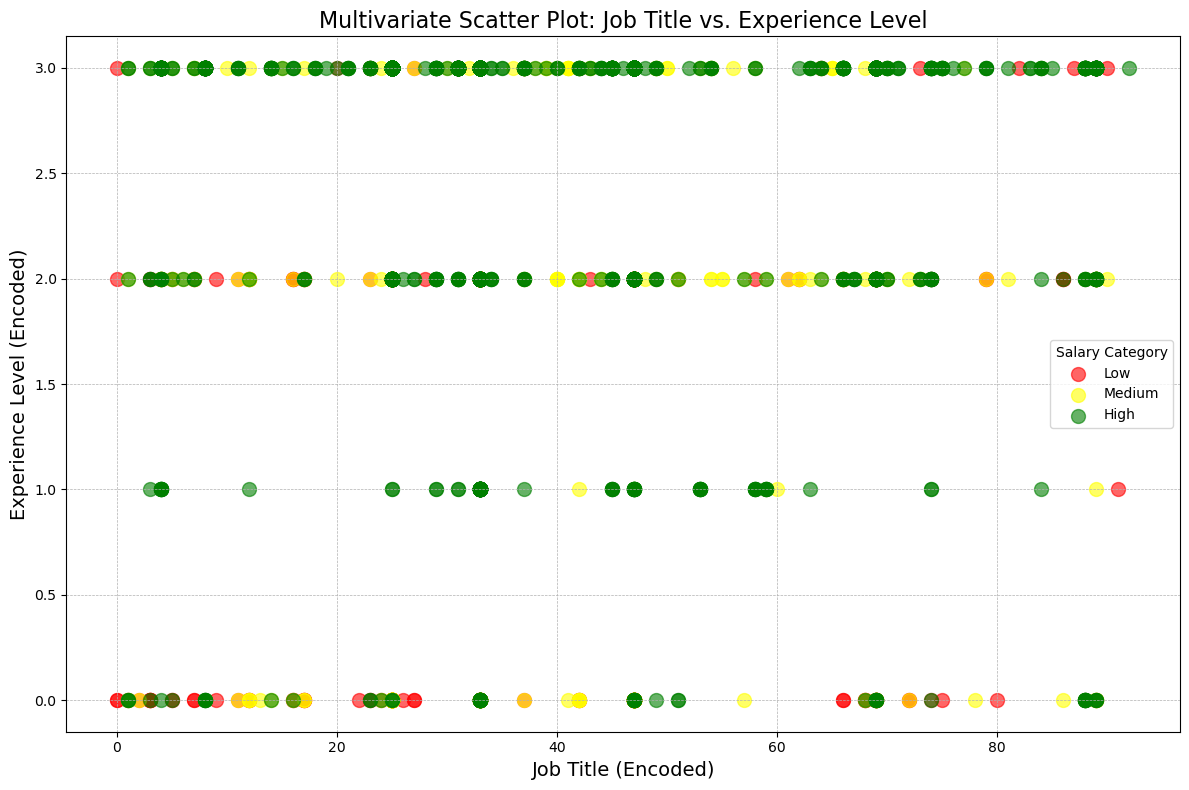

In [25]:
# Plotting a multivariate scatter plot
plt.figure(figsize=(12, 8))
for category, color in zip(['Low', 'Medium', 'High'], ['red', 'yellow', 'green']):
    idx = y == category
    plt.scatter(X[idx]['job_title'], X[idx]['experience_level'], c=color, label=category, s=100, alpha=0.6)

plt.xlabel('Job Title (Encoded)', fontsize=14)
plt.ylabel('Experience Level (Encoded)', fontsize=14)
plt.title('Multivariate Scatter Plot: Job Title vs. Experience Level', fontsize=16)
plt.legend(title='Salary Category')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

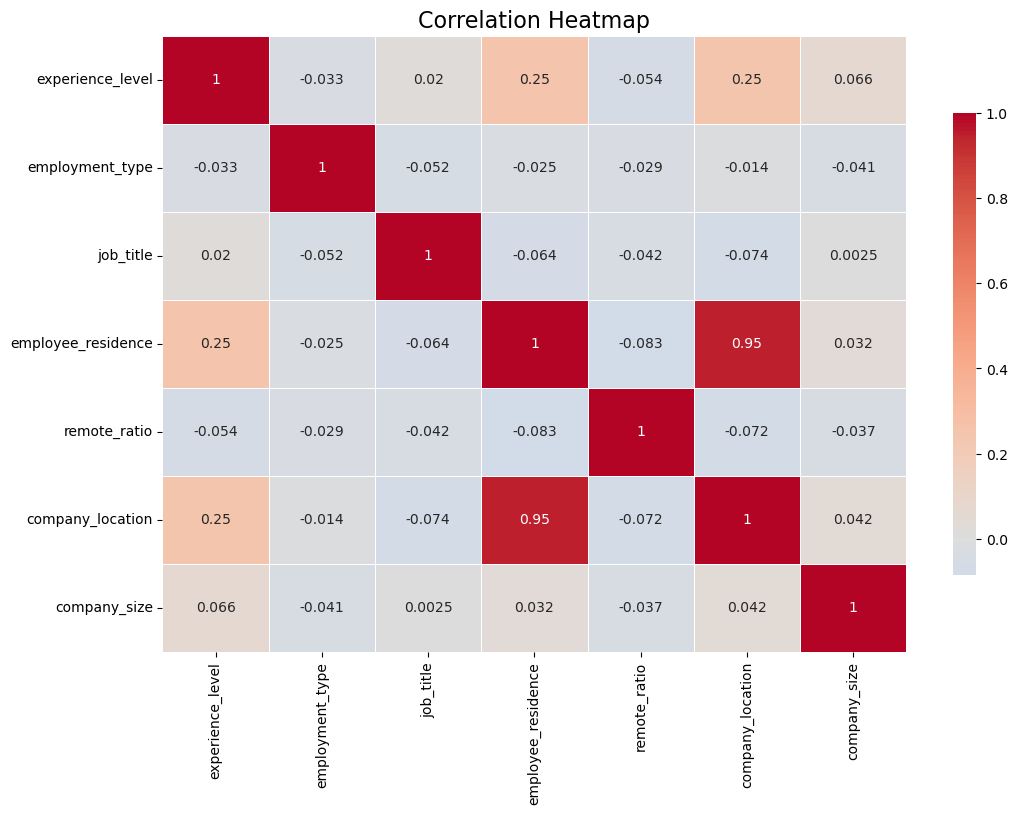

In [26]:
import seaborn as sns

# Compute the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=.5, cbar_kws={"shrink": 0.75})
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [30]:
# Creating a summary table for precision, recall, and F1-score for XGBoost (after tuning)
metrics_summary = {
    'Salary Category': ['Low', 'Medium', 'High'],
    'Precision': [0.71, 0.53, 0.83],
    'Recall': [0.60, 0.34, 0.94],
    'F1-Score': [0.65, 0.41, 0.88]
}

# Convert dictionary to DataFrame for display
metrics_df = pd.DataFrame(metrics_summary)
metrics_df


,Salary Category,Precision,Recall,F1-Score
0,Low,0.71,0.60,0.65
1,Medium,0.53,0.34,0.41
2,High,0.83,0.94,0.88
